# Fitting?

### Curve Fitting
- 주어진 포인트를 지나는 또는 포인트들에 가장 가까운 커브를 생성한다.  
  = 포인트와의 오차가 0 또는 최소가 되는 커브(함수)를 구한다.

### Circle Fitting
- 최적의 중심좌표 (x,y)와 반지름 r을 찾는다.
<img src='https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/22643/versions/1/screenshot.png' style="width: 30%; height: auto;">

### Excel 추세선
- 데이터 포인트를 잘 설명할 수 있는 함수를 구하는 기능.
- 함수의 종류(선형함수, 지수함수, 다항식 등)와 차수를 정한다.
- 계수(parameter)가 자동 계산됨.



# 일반적인 Fitting 절차
#### 0. 기준이 될 포인트(데이터)가 주어진다.
#### 1. 함수의 종류(모델의 종류)를 정한다.
#### 2. 모델의 복잡도(차수, parameter(계수)의 수)를 정한다.
#### 3. 오차를 정의한다. (커브와 포인트 간의 거리, 평균제곱오차(Mean Squared Error, MSE) 등)
#### 4.  오차가 최소화되는 계수값을 구한다.

# Least Square Method - Polynomial

<a href="https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)">Wikipedia</a>
[Polynomial 수식 유도](http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html)

###  1. 함수의 종류: 다항식(Polynomial)
### $$ f(x;a_0, ... , a_k) = a_0 + a_1 x + a_2 x^2 + ... + a^k x^k = \sum_{i=0}^{k} {a_i x^i}$$

### 2. 차수: k (몇 차 다항식인가?)

### 3. 오차: Sum of Squared Error (오차의 제곱을 다 더함)
### $$ E(\{x_1, ... , x_N\}, \{y_1, ... , y_N\}; a_0, ... , a_k) = \sum_{n=1}^{N} {(f(x_n;a_0, ... , a_k) - y_n)^2} $$

### 4. 계산법: 오차를 계수로 미분하면 0이 나와야 함 -> 연립방정식 -> 행렬 연산으로 계산!


In [1]:
# https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)
# http://mathworld.wolfram.com/LeastSquaresFittingPolynomial.html
#Motivational_example

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# retrun: [1 x x^2 ... x^k] (shape= (N,1+k))
def buildX(x, k):
    X = np.ones_like(x)
    for i in range(k):
        X = np.hstack((X, np.power(x, i + 1)))
    
    return np.matrix(X)

# return: compute polynomial (shape= (N,1))
def evaluate(a, x):
    y = np.zeros((x.shape[0], 1))
    
    for i in range(a.shape[0]):
        y += a[i, 0] * np.power(x, i)
        
    return y

# return: sum of squred error (shape= (1,1))
def sqrErr(d, o):
    return np.sum(np.power(d - o, 2), 0) / 2.

def fit(X, y):
    
    a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return a

def plot(input, a):
    k = a.shape[0] - 1;
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_title(u'Fit Polynomial Fn, $k = %d$' % k, fontsize=20)
    ax.set_xlabel(u'$x$', fontsize=15)
    ax.set_ylabel(u'$y$', fontsize=15, rotation='horizontal')
    ax.text(1.05, 1, '\n'.join('$a_%d = %f$' % (i, a[i]) for i in range(k+1)), 
            transform=ax.transAxes, verticalalignment='top', fontsize=15)

    xx = np.linspace(0, 5)
    yy = evaluate(a, np.matrix(xx).T)
    ax.plot(xx, yy, color='b')

    ax.scatter(input[:,0], input[:,1], color='r')
    
    o = evaluate(a, np.matrix(input[:, 0]))
    
    err = sqrErr(np.matrix(input[:, 1]), o)
    
    ax.text(0.5, 0.9, u'$E = %f$' % err, fontsize=15, transform=ax.transAxes)


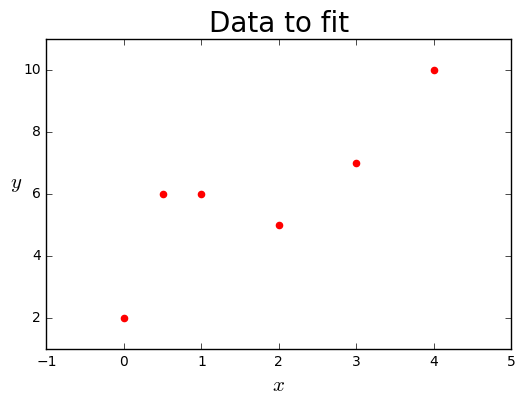

In [2]:
# shape = (N,1+1)
input = np.matrix([
    [0, 2],
    [0.5, 6],
    [1, 6],
    [2, 5],
    [3, 7],
    [4, 10],
    #[5, 100],
])

# shape = (N,1)
x = input[:,0]

# shape = (N,1)
y = np.matrix(input[:,1])

fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_title(u'Data to fit', fontsize=20)
ax.set_xlabel(u'$x$', fontsize=15)
ax.set_ylabel(u'$y$', fontsize=15, rotation='horizontal')
ax.scatter(x, y, color='r')

이 6개 포인트를 polynomial 함수로 fitting해 보자. k를 바꿔가며 실행해보자.

X = 
[[ 1  0  0  0]
 [ 1  0  0  0]
 [ 1  1  1  1]
 [ 1  2  4  8]
 [ 1  3  9 27]
 [ 1  4 16 64]]


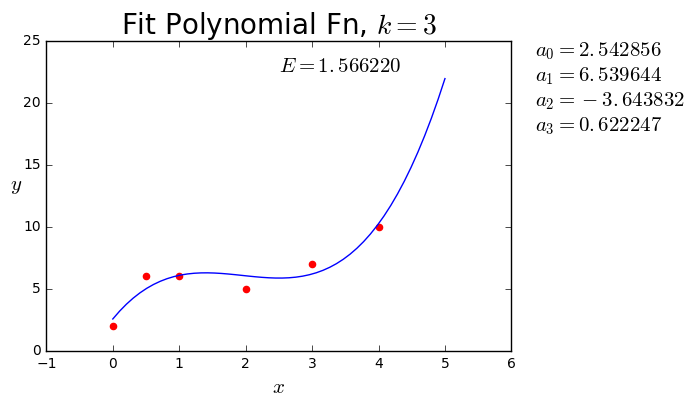

In [8]:
k = 3

# shape = (N,1+k)
#X = np.matrix([np.ones(N), x]).T
#X = np.matrix([np.ones(N), np.power(x, 1), np.power(x, 2), np.power(x, 3)]).T
X = buildX(x, k)

# shape = (k+1,1)
a = fit(X, y)

plot(input, a)

print u'X = '
print X.astype(int)


# Least Square Method - Polynomial + Gradient Descent

최적의 계수를 찾을 때, 연립 방정식을 한방에 풀지 않고, 오차값이 줄어들도록 다시 말해 **오차의 미분값이 음수인 방향으로** 계수를 조금씩 바꿔가며 찾을 수도 있다. 이것이 기계학습에서 가장 흔히 사용되는 최적화 기법인 **Gradient Descent ** method 다.

In [9]:
def plot_GD(epoch, a, x, y, err):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    xx = np.linspace(0, 5)
    yy = evaluate(a, np.matrix(xx).T)
    
    ax.plot(xx, yy, color='b')
    ax.scatter(x, y, color='r')
    ax.set_title(u'Fit Polynomial Fn w/ Gradient Descent Method, Epoch = %d' % epoch)
    ax.set_xlabel(u'$x$', fontsize=15)
    ax.set_ylabel(u'$y$', fontsize=15, rotation='horizontal')
    ax.text(1.05, 1, '\n'.join('$a_%d = %f$' % (i, a[i]) for i in range(a.shape[0])), 
            transform=ax.transAxes, verticalalignment='top', fontsize=15)
    
    ax.text(0.5, 0.9, u'$E = %f$' % err, fontsize=15, transform=ax.transAxes)

    plt.show()
    
def fit_GD(X, y, epoch, mu):
    
    a = np.zeros([X.shape[1], 1])
    
    E = 0
    
    for i in range(epoch):
        
        f = X.dot(a)
        e = y - f
        E = 0.5 * np.sum(np.power(e, 2))

        if (i % (epoch / 10) == 0):
            plot_GD(i, a, X[:, 1], y, E)

        gradE = - e.T.dot(X).T
        
        a -= mu * gradE.sum(1)


    plot_GD(epoch, a, X[:, 1], y, E)
    
    return a

Gradient 계산을 반복하면서 조금씩 오차를 줄여나간다.

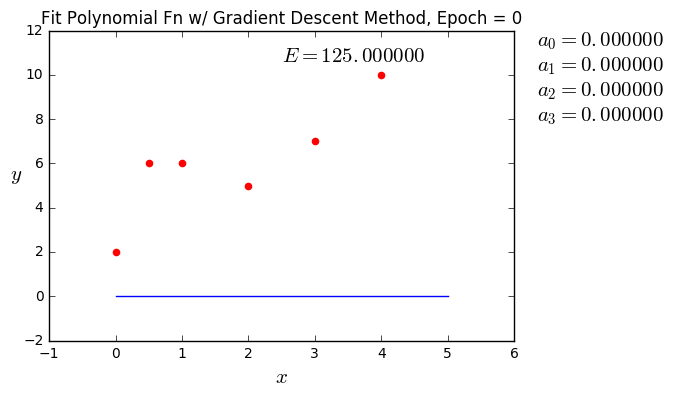

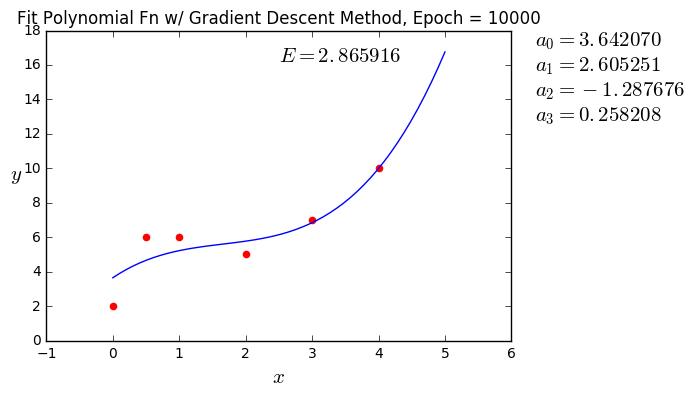

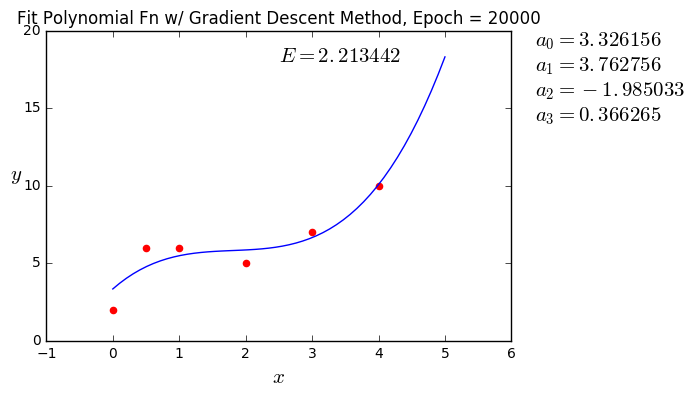

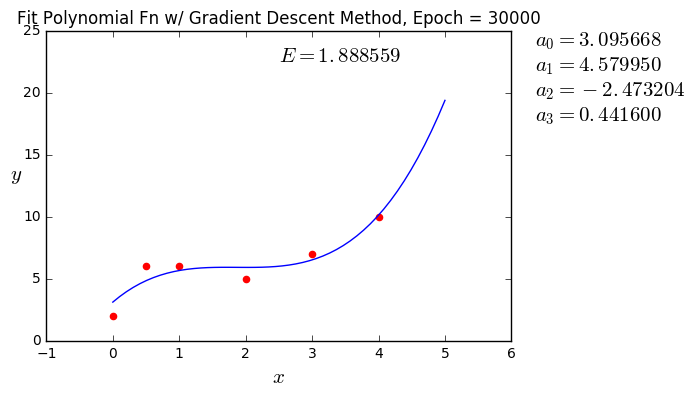

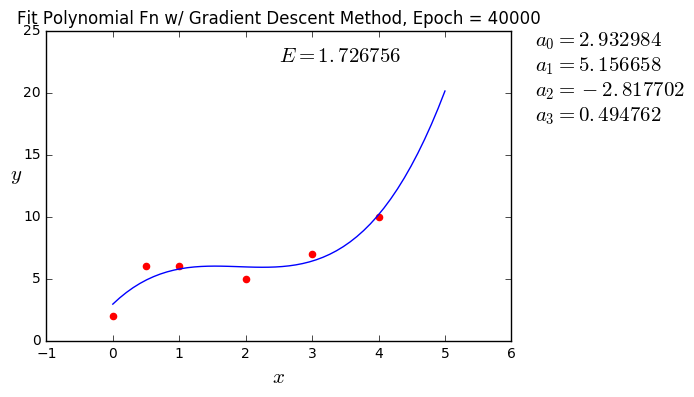

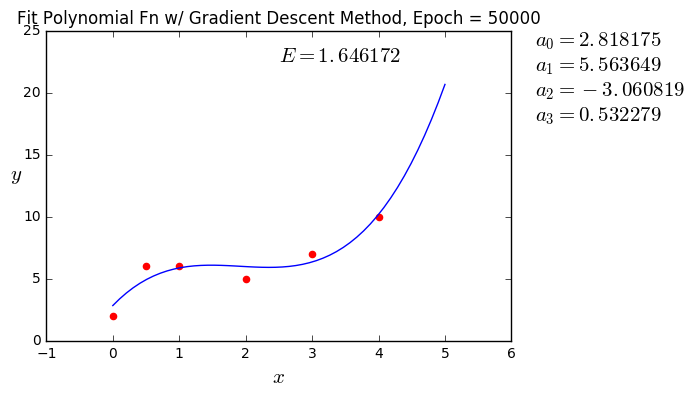

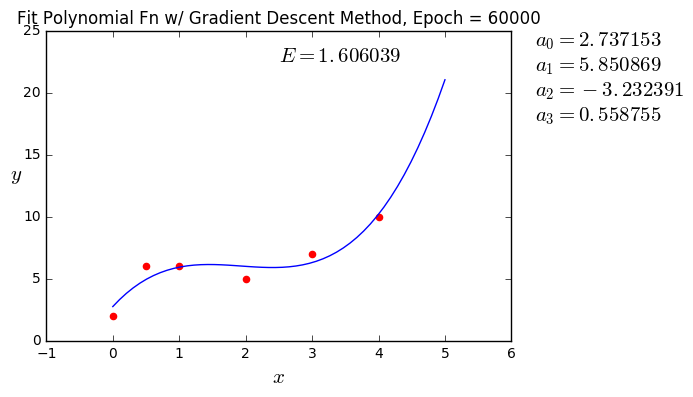

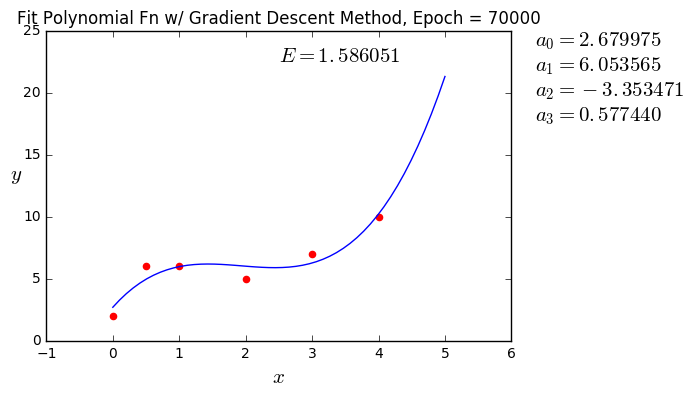

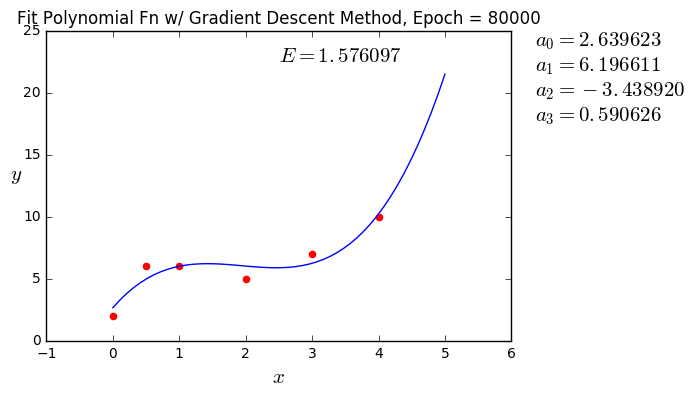

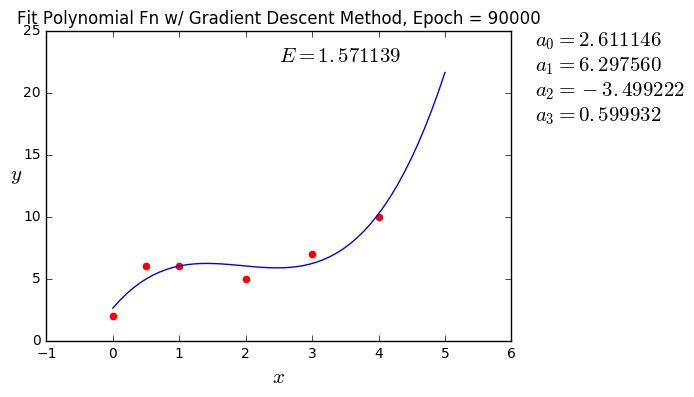

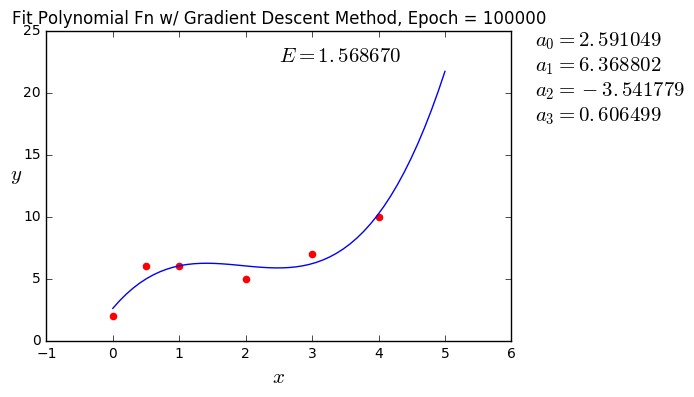

In [10]:
#a = np.zeros([k+1, 1])

''' Learning rate (학습속도) '''
mu = 0.0003

''' 반복 횟수 '''
epoch = 100000

a = fit_GD(X, y, epoch, mu)

# Fitting이 학습이다!!!

- 라면 여러 개를 한번에 끓일 때 물을 얼마나 넣어야 하나? = 라면 x 개를 한꺼번에 끓일 때 적당한 물의 양 y mL의 함수
- 공구를 오래 사용할 때 가공오차가 얼마나 늘어나지? = 공구사용시간 x 시간과 가공오차 y mm의 함수
- 환자에게 마취제를 얼마나 투여해야하나? = 환자 체중 x kg과 투여량 y ml의 함수

# 그럼 분류 문제 학습은? 이것도 Fitting이지!
- 공구 사용한지 x 시간이 지났는데 공구를 교체해야 하나? = 공구사용시간 x 시간과 파손 가능성 y %의 함수 > 70% ?
- 오늘 주가가 x 포인트 올랐는데 팔아야하나? = 주가 변화량 x 포인트와 내일 주가 변화량 y 포인트의 함수 < 0 ?

함수와 판단 기준값(threshold)을 Fitting한다!

# Step Function

자 그럼 분류문제를 fitting하기 위해서는 어떤 함수를 학습해야 할까?

먼저 확실하게 yes/no 가 나오는 step function 이 있다.

## $$ 
step(x; a) = \left\{\begin{matrix}
1, & x \geq  a \\ 
0, & \mathtt{otherwise.}
\end{matrix}\right.
$$

In [11]:
def step(x, a):
    return 1 * (x > a)



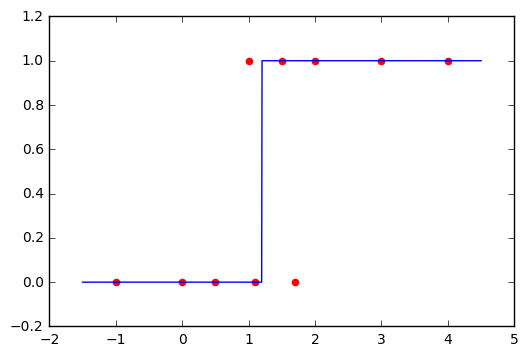

In [12]:
input = np.array([
    [-1, 0],
    [0, 0],
    [0.5, 0],
    [1, 1],
    [1.1, 0],
    [1.5, 1],
    [1.7, 0],
    [2, 1],
    [3, 1],
    [4, 1],
])

ax = plt.figure(1)

plt.scatter(input[:,0], input[:,1], color='r')

testx = np.linspace(-1.5, 4.5, num=1000)
plt.plot(testx, step(testx, 1.2), color='b')

# Logistic Sigmoid Function
그런데 step function 은 0에서 미분이 안되기 때문에 gradient descent 같은 최적화 기법을 쓰기 힘들다.
그래서 보통은 아래와 같이 step function 을 좀 부드럽게 만든 **logistic sigmod** 함수를 사용한다.
## $$  sigm(x) = \frac{1}{1 + e^{-a (x - b)}} $$

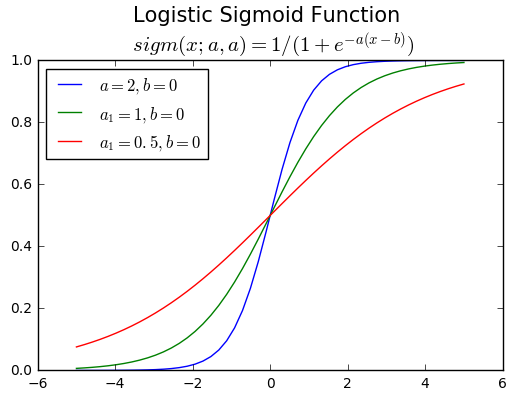

In [13]:
def sigmoid(x):
    return 1 / (1 + np.exp(-1 * x))

test_x = np.linspace(-5, 5)
ax = plt.figure().add_subplot(111)
ax.plot(test_x, sigmoid(2 * test_x), label='$a=2, b=0$')
ax.plot(test_x, sigmoid(test_x), label='$a_1=1, b=0$')
ax.plot(test_x, sigmoid(0.5 * test_x), label='$a_1=0.5, b=0$')
ax.set_title(u'Logistic Sigmoid Function \n $sigm (x;a,a) = 1/(1 + e^{-a(x - b)})$', fontsize=15)
ax.legend(loc=2)

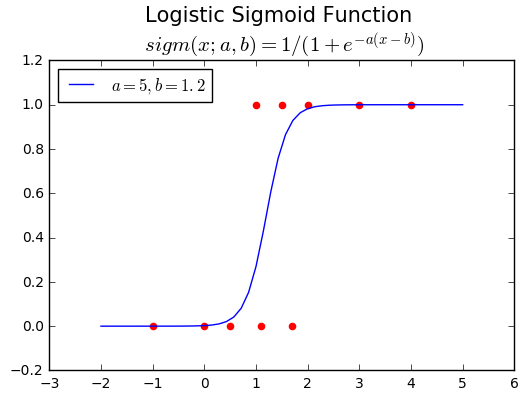

In [14]:
ax = plt.figure(1).add_subplot(111)
xx = np.linspace(-2, 5)
yy = 1 / (1 + np.exp(- (5 * (xx - 1.2))))
ax.plot(xx, yy.T, color='b', label='$a=5, b=1.2$')

ax.scatter(input[:,0], input[:,1], color='r')
ax.set_title(u'Logistic Sigmoid Function \n $sigm (x;a, b) = 1/(1 + e^{-a(x - b)})$', fontsize=15)
ax.legend(loc=2)

# Logistic Regression

[참고](http://aimotion.blogspot.kr/2011/11/machine-learning-with-python-logistic.html)

그렇다면 $a_0$, $a_1$ 계수값은 어떻게 구해야 할까? 딱 보니까 exponential의 승수가 1차 다항식 꼴이다. 아래와 같이 식을 풀어주면 위에서 했던 Least Square Method로 fitting할 수 있다.

## $$  f(x) = \frac{1}{1 + e^{-(a_0 + a_1 x)}} $$

## $$  g(x) = a_0 + a_1 x  = -log (1/f(x) -1) $$

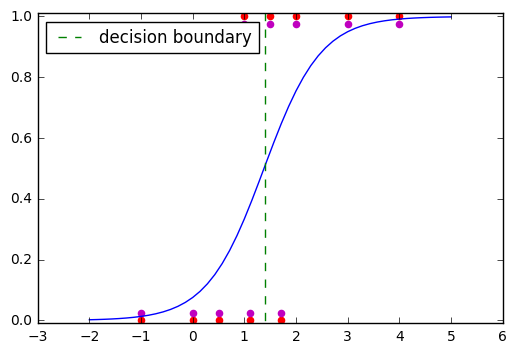

In [15]:
# 판단기준값(threshold)
threshold = 0.5
y = (input[:,1] - threshold) * 0.95 + 0.5

liny = - np.log(1 / y - 1)

x = input[:,0]

X = np.matrix([np.ones(input.shape[0]), x]).T
linY = np.matrix(liny).T
a = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(linY)

xx = np.linspace(-2, 5)
linyy = np.array(a[0] + a[1] * xx)
yy = 1 / (1 + np.exp(-linyy))


ax = plt.figure().add_subplot(111)
ax.plot(xx, yy.T, color='b')
ax.scatter(input[:,0], input[:,1], color='r')
ax.scatter(input[:,0], y, color='m')
ax.set_ylim([-0.01, 1.01])
ax.plot([1.4, 1.4], [-1, 3], '--', color='g', label='decision boundary')
ax.legend(loc=2)

In [16]:
''' Decision Boundary'''
b = -a[0]/a[1]
print 'b = ', b

b =  [[ 1.38]]


# Take-Home Message

### - Fitting 이 학습이다.
### - Fitting 절차
####   0. 기준이 될 포인트(데이터)가 주어진다.
####   1. 함수의 종류(모델의 종류)를 정한다.
####   2. 모델의 복잡도(차수, parameter(계수)의 수)를 정한다.
####   3. 오차를 정의한다. (커브와 포인트 간의 거리, 평균제곱오차(Mean Squared Error, MSE) 등)
####   4.  오차가 최소화되는 계수값을 구한다.

### - 계수 값 결정 (최적화)
#### 방법1. 오차 함수의 미분값이 0이 되는 계수값을 한 방에 구한다.
#### 방법2. Gradient descent : 오차가 줄어드는 (미분값이 -) 방향으로 계수를 조금씩 바꿔준다.

### - 분류 학습도 Fitting이다. (Logistic Sigmoid Function) $$  f(x) = \frac{1}{1 + e^{-x}} $$

# Linearly Separable

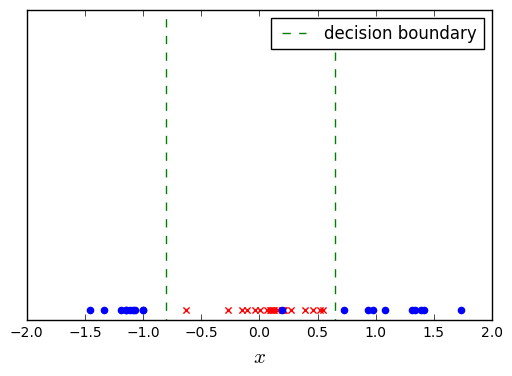

In [17]:
np.random.seed(9)

ax = plt.figure().add_subplot(111)

N = 10
x1 = 0.3 * np.random.randn(N) - 1
x2 = 0.3 * np.random.randn(2 * N)
x3 = 0.3 * np.random.randn(N) + 1
ax.scatter(x1, np.zeros(N), marker='o', color='b')
ax.scatter(x2, np.zeros(2 * N), marker='x', color='r')
ax.scatter(x3, np.zeros(N), marker='o', color='b')
ax.set_ylim(-0.1,3)
ax.set_xlabel('$x$', fontsize=15)
ax.set_yticks([])

ax.plot([-0.8, -0.8], [-1, 3], '--', color='g')
ax.plot([0.65, 0.65], [-1, 3], '--', color='g', label='decision boundary')
ax.legend()

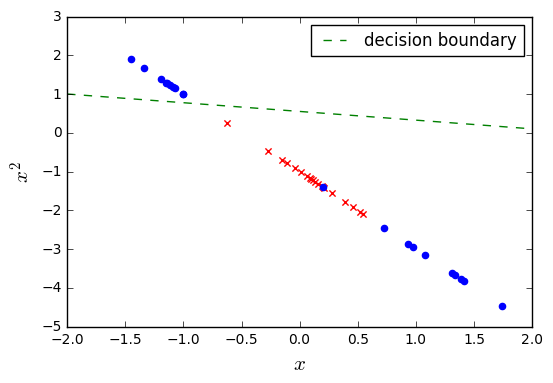

In [18]:
def plotDecisionBoundary2D(x1, x2, x3, f_x):
    ax = plt.figure().add_subplot(111)

    ax.scatter(x1, f_x(x1), marker='o', color='b')
    ax.scatter(x2, f_x(x2), marker='x', color='r')
    ax.scatter(x3, f_x(x3), marker='o', color='b')
    ax.set_xlim(-2,2)
    #ax.set_ylim(-0.1,3)
    ax.set_xlabel('$x$', fontsize=15)
    ax.set_ylabel('$x^2$', fontsize=15)

    ax.plot([-2.0, 2.0], [1, 0.1], '--', color='g', label='decision boundary')
    ax.legend()
    
f_x_1 = (lambda x: -2 * x - 1)
plotDecisionBoundary2D(x1, x2, x3, f_x_1)

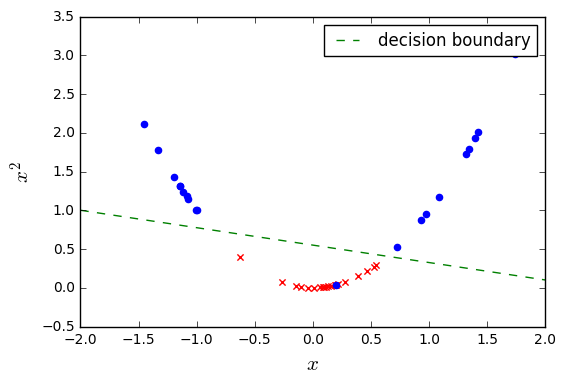

In [19]:
f_x_2 = (lambda x: np.power(x,2))
plotDecisionBoundary2D(x1, x2, x3, f_x_2)